step 2 Item Categorization and Analysis & Insights

- Develop a method to categorize items into logical groups
- Document your approach and reasoning, including why you chose this approach over
alternatives
- Ensure your solution can handle both English and Arabic text
- Show us multiple approaches you considered and why you picked one
-  Calculate the proportion of spend across different categories
- Identify any interesting patterns or anomalies
- Visualize your findings effectively
- Walk us through your exploratory process, not just final results

In [19]:
# Test all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from collections import Counter
import sys

print("✅ All libraries imported successfully!")
print(f"Python executable: {sys.executable}")
print(f"Pandas version: {pd.__version__}")
print(f"Seaborn version: {sns.__version__}")

✅ All libraries imported successfully!
Python executable: d:\work\Aajil\Purchase Order Item Categorization Challenge\aajil-purchase-order-categorization\venv\Scripts\python.exe
Pandas version: 2.3.2
Seaborn version: 0.13.2


## 2.1 Develop a method to categorize items into logical groups

features to categorize items based on 

- revenue (divide the range of prices into categories)
- keywords in item name (choose some keywords that can distinguish most of the items into different groups)
- product ID with corosponding Item name.

## 2.1.1 revenue

In [20]:
# read the preproceed data from data directory
df = pd.read_excel(r'D:\work\Aajil\Purchase Order Item Categorization Challenge\aajil-purchase-order-categorization\data\df.xlsx')

print("=== BASIC DATASET INFO ===")
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(f"Data types:\n{df.dtypes}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

=== BASIC DATASET INFO ===
Dataset shape: (3150, 10)
Columns: ['Item ID', 'Item Name', 'Quantity', 'Purchase Order ID', 'Product ID', 'Sub_Total_in_SAR', 'Total_in_SAR', 'Item price_in_SAR', 'has_arabic', 'has_english']
Data types:
Item ID                int64
Item Name             object
Quantity             float64
Purchase Order ID      int64
Product ID           float64
Sub_Total_in_SAR     float64
Total_in_SAR         float64
Item price_in_SAR    float64
has_arabic              bool
has_english             bool
dtype: object
Memory usage: 0.50 MB


In [21]:
# Set pandas to display floats with commas and no scientific notation
pd.options.display.float_format = '{:,.2f}'.format

print(df['Item price_in_SAR'].describe())

count       3,150.00
mean        4,455.28
std        33,998.51
min             0.00
25%            47.00
50%           428.98
75%         2,300.00
max     1,150,000.00
Name: Item price_in_SAR, dtype: float64


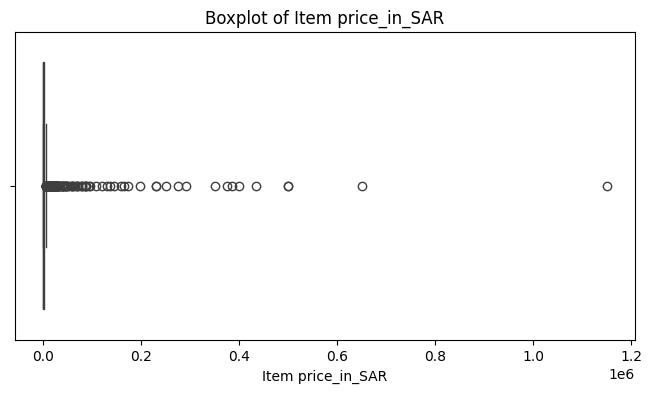

In [22]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Item price_in_SAR'].dropna())
plt.title('Boxplot of Item price_in_SAR')
plt.xlabel('Item price_in_SAR')
plt.show()


In [23]:
top5_prices = df.nlargest(5, 'Item price_in_SAR')
print(top5_prices)

                  Item ID                                          Item Name  \
1347  3263831000006835200                                       خرسانة جاهزة   
1606  3263831000008812032                                 حديد مقاسات مختلفة   
1231  3263831000005875200  اعمال تركيب الهناجر (50% من تصنيع وتركيب الهيك...   
1014  3263831000004552192                                حديد قطاعات (كيربي)   
2653  3263831000021510144                                         مواد كسارة   

      Quantity    Purchase Order ID                   Product ID  \
1347      1.00  3263831000006835200 3,263,831,000,006,838,784.00   
1606      1.00  3263831000008812032 3,263,831,000,008,821,760.00   
1231      1.00  3263831000005875200 3,263,831,000,005,894,144.00   
1014      1.00  3263831000004552192 3,263,831,000,004,559,872.00   
2653      1.00  3263831000021510144 3,263,831,000,021,434,880.00   

      Sub_Total_in_SAR  Total_in_SAR  Item price_in_SAR  has_arabic  \
1347      1,150,000.00  1,150,000.00   

In [ ]:
# Calculate the percentage of each item's price to the total sum of item prices
total_price = df['Item price_in_SAR'].sum()

# Add a new column for percentage (as a float)
df['Item price % of total'] = df['Item price_in_SAR'] / total_price * 100  # as percent, float

# For display only, you can format as string with commas
df['Item price % of total (formatted)'] = df['Item price % of total'].apply(lambda x: '{:,.2f}'.format(x))

# Sort descending by the new percentage column and return the top 5
top5_by_percent = df.sort_values('Item price % of total', ascending=False).head(5)
print(top5_by_percent[['Item Name', 'Item price_in_SAR', 'Item price % of total (formatted)']])


                                              Item Name  Item price_in_SAR  \
1347                                       خرسانة جاهزة       1,150,000.00   
1606                                 حديد مقاسات مختلفة         650,000.00   
1231  اعمال تركيب الهناجر (50% من تصنيع وتركيب الهيك...         500,000.00   
1014                                حديد قطاعات (كيربي)         499,000.00   
2653                                         مواد كسارة         434,782.61   

     Item price % of total (formatted)  
1347                              8.19  
1606                              4.63  
1231                              3.56  
1014                              3.56  
2653                              3.10  


In [27]:
# Count rows where the value is greater than 1
count_gt_1 = (df['Item price % of total'] >= 1).sum()
count_gt_01 = ((df['Item price % of total'] < 1) & (df['Item price % of total'] >= 0.1)).sum()
count_gt_001 = ((df['Item price % of total'] < 0.1) & (df['Item price % of total'] >= 0.01)).sum()
count_lt_001 = (df['Item price % of total'] < 0.01).sum()
print(f"Number of rows with 'Item price % of total' > 1: {count_gt_1}")
print(f"Number of rows with 0.1 <= 'Item price % of total' < 1: {count_gt_01}")
print(f"Number of rows with 0.01 <= 'Item price % of total' < 0.1: {count_gt_001}")
print(f"Number of rows with 'Item price % of total' < 0.01: {count_lt_001}")

Number of rows with 'Item price % of total' > 1: 19
Number of rows with 0.1 <= 'Item price % of total' < 1: 80
Number of rows with 0.01 <= 'Item price % of total' < 0.1: 1140
Number of rows with 'Item price % of total' < 0.01: 1911


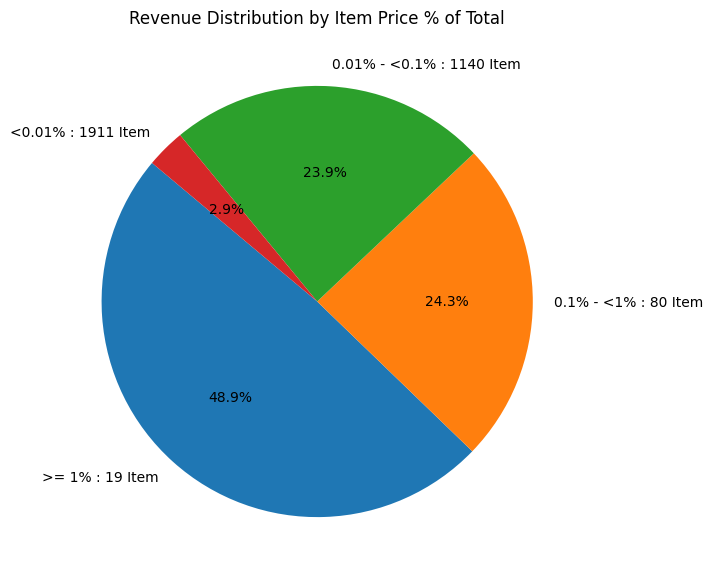

In [29]:
# Define the groups based on 'Item price % of total'
group_labels = [
    ">= 1% : 19 Item",
    "0.1% - <1% : 80 Item",
    "0.01% - <0.1% : 1140 Item",
    "<0.01% : 1911 Item"
]

# Create boolean masks for each group
mask_gt_1 = df['Item price % of total'] >= 1
mask_gt_01 = (df['Item price % of total'] < 1) & (df['Item price % of total'] >= 0.1)
mask_gt_001 = (df['Item price % of total'] < 0.1) & (df['Item price % of total'] >= 0.01)
mask_lt_001 = df['Item price % of total'] < 0.01

# Calculate total revenue for each group
revenue_gt_1 = df.loc[mask_gt_1, 'Item price_in_SAR'].sum()
revenue_gt_01 = df.loc[mask_gt_01, 'Item price_in_SAR'].sum()
revenue_gt_001 = df.loc[mask_gt_001, 'Item price_in_SAR'].sum()
revenue_lt_001 = df.loc[mask_lt_001, 'Item price_in_SAR'].sum()

revenues = [revenue_gt_1, revenue_gt_01, revenue_gt_001, revenue_lt_001]

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(revenues, labels=group_labels, autopct='%1.1f%%', startangle=140)
plt.title('Revenue Distribution by Item Price % of Total')
plt.show()

observations and conclusions

- The distribution of the item price is very skewed to the left. It means there are a few items with very large prices and many items with small prices.
- These kinds of distribution must be treated as a percentage of the total. to measure how each one or group affects the whole revenue
- After calculating the percentage and formatting it * 100 to be easily noticed, we categorize them based on a one-digit comma shift.
- The chart shows that around 19 items generate around 50% of the revenue, and 1911 items generate less than 3 %. 
- This can lead to decisions like increasing Ads or discounts to those higher items.

## 2.1.2 Keywords

In [37]:
import re
from collections import Counter

# Extract all words from 'Item Name', case sensitive
all_words = []
for text in df['Item Name'].dropna():
    # Extract words (case sensitive, so no .lower())
    words = str(text).split()
    all_words.extend(words)

# Helper functions for language detection
def is_arabic(word):
    return bool(re.search(r'[\u0600-\u06FF\u0750-\u077F\u08A0-\u08FF\uFE70-\uFEFF]', word))

def is_english(word):
    return bool(re.search(r'[a-zA-Z]', word)) and not is_arabic(word)

# Count occurrences
word_counts = Counter(all_words)

# Separate into Arabic and English words
arabic_words = [(word, count) for word, count in word_counts.items() if is_arabic(word)]
english_words = [(word, count) for word, count in word_counts.items() if is_english(word)]

# Create DataFrames
arabic_df = pd.DataFrame(arabic_words, columns=['Word', 'Count']).sort_values('Count', ascending=False).reset_index(drop=True)
english_df = pd.DataFrame(english_words, columns=['Word', 'Count']).sort_values('Count', ascending=False).reset_index(drop=True)

# Display the top 10 from each table
print(len(arabic_df), "unique Arabic words found.")
print("Top 10 Arabic words:")
display(arabic_df.head(10))

print(len(english_df), "unique English words found.")
print("Top 10 English words:")
display(english_df.head(10))

1003 unique Arabic words found.
Top 10 Arabic words:


,Word,Count
0,حديد,513
1,مم,338
2,تسليح,310
3,سابك,202
4,م,184
5,ملم,150
6,سماكة,128
7,صاج,124
8,اسود,116
9,ﻣ,97


2661 unique English words found.
Top 10 English words:


,Word,Count
0,mm,264
1,F,226
2,x,195
3,Bar,150
4,MM,142
5,X,126
6,Deformed,113
7,Straight,107
8,3p,106
9,Black,99


In [38]:
# Filter: remove words with only one character or words that are all digits (no letters)

def filter_words(df):
    # Keep words with length > 1 and at least one non-digit character
    return df[(df['Word'].str.len() > 1) & (~df['Word'].str.fullmatch(r'\d+'))].reset_index(drop=True)

arabic_df = filter_words(arabic_df)
english_df = filter_words(english_df)

print(len(arabic_df), "unique Arabic words after filteration.")
print("Filtered Top 10 Arabic words:")
display(arabic_df.head(10))

print(len(english_df), "unique English words after filteration.")
print("Filtered Top 10 English words:")
display(english_df.head(10))

925 unique Arabic words after filteration.
Filtered Top 10 Arabic words:


,Word,Count
0,حديد,513
1,مم,338
2,تسليح,310
3,سابك,202
4,ملم,150
5,سماكة,128
6,صاج,124
7,اسود,116
8,متر,78
9,اتفاق,77


2637 unique English words after filteration.
Filtered Top 10 English words:


,Word,Count
0,mm,264
1,Bar,150
2,MM,142
3,Deformed,113
4,Straight,107
5,3p,106
6,Black,99
7,(Unit:,94
8,PPR,68
9,HDG,62


In [40]:
arabic_stop_words = [
    "مم", "ملم","ملي","متر","سنتي","كيلو","جرام","طن","لتر","مليمتر","سنتيمتر","كيلومتر","غرام","كجم","كغم","سم","سم²","سم3","م²","م3"
]
# Remove Arabic stop words
arabic_df = arabic_df[~arabic_df['Word'].isin(arabic_stop_words)].reset_index(drop=True)

In [41]:
print(len(arabic_df), "unique Arabic words after filteration.")
print("Filtered Top 10 Arabic words:")
display(arabic_df.head(10))

917 unique Arabic words after filteration.
Filtered Top 10 Arabic words:


,Word,Count
0,حديد,513
1,تسليح,310
2,سابك,202
3,سماكة,128
4,صاج,124
5,اسود,116
6,اتفاق,77
7,ماسورة,73
8,بوصة,57
9,12متر,57


In [42]:
english_stop_words = [
    "the", "and", "of", "for", "in", "on", "with", "to", "a", "an", "by", "at", "from", "is", "as", "or", "this", "that", "it", "item", "unit", "pcs", "piece", "each", "per", "set", "box", "pack", "qty", "no", "type", "size", "model", "code"
    ,"mm", "ml", "cm", "kg", "g", "l", "mm", "cm2", "cm3", "m2", "m3"
]
# Remove English stop words
english_df = english_df[~english_df['Word'].isin(english_stop_words)].reset_index(drop=True)

In [43]:
print(len(english_df), "unique English words after filteration.")
print("Filtered Top 10 English words:")
display(english_df.head(10))

2618 unique English words after filteration.
Filtered Top 10 English words:


,Word,Count
0,Bar,150
1,MM,142
2,Deformed,113
3,Straight,107
4,3p,106
5,Black,99
6,(Unit:,94
7,PPR,68
8,HDG,62
9,Ekip,55


observations and conclusions

- words can be used to determine categories, but it needs some domain knowledge to be able to match each word in the table with an equivalent category, then search for those words in the Item name. If any match, then the equivalent category is assigned.
- No need to match each word with its category name, start with the most appearances, and so on; it will be finished within around 50 distinct words.
- I filter most of the stop words that appear frequently and do not affect the category, but I can not go further because of the risk of dropping any word that is significant to any category due to my lack of domain knowledge.
- This way needs around 1-2 hours of a domain expert to annotate this table, then it will be fully ready.
- From my observations, I suggest that there are 3 types of categories. [electrical, mechanical, construction]

## 2.1.3 product ID with corosponding Item name

In [46]:
# Print value counts of Product ID (excluding NaN)
print("=== PRODUCT ID VALUE COUNTS ===")
print(df['Product ID'].value_counts(dropna=True))

=== PRODUCT ID VALUE COUNTS ===
Product ID
3,263,831,000,009,355,776.00    25
3,263,831,000,009,358,848.00    22
3,263,831,000,007,325,184.00    22
3,263,831,000,022,280,192.00    21
3,263,831,000,009,338,880.00    20
                                ..
3,263,831,000,006,594,048.00     1
3,263,831,000,006,241,792.00     1
3,263,831,000,006,194,176.00     1
3,263,831,000,009,085,952.00     1
3,263,831,000,007,333,888.00     1
Name: count, Length: 894, dtype: int64


In [47]:
# how many Product IDs that occur only once
product_id_counts = df['Product ID'].value_counts(dropna=True)
single_occurrence_count = (product_id_counts == 1).sum()
print(f"Number of Product IDs that occur only once: {single_occurrence_count}")

Number of Product IDs that occur only once: 329


In [ ]:
# Extract the category from Product ID
# Assuming Product ID is a numeric value, we convert it to string and extract the relevant part
def extract_category(product_id):
    if pd.isna(product_id):
        return np.nan
    try:
        # Convert to integer string without decimals or scientific notation
        cleaned_id = str(int(float(product_id)))
        # Pad with zeros in case it's shorter than expected
        cleaned_id = cleaned_id.zfill(12)
        return cleaned_id[10:13]  # middle group (third three digits from right)
    except:
        return np.nan

df['Product ID Category'] = df['Product ID'].apply(extract_category)

print("=== PRODUCT ID CATEGORY VALUE COUNTS ===")
print(df['Product ID Category'].value_counts(dropna=True))

=== PRODUCT ID CATEGORY VALUE COUNTS ===
Product ID Category
004    332
003    232
007    207
006    160
009    159
025    159
010    158
011    145
017    139
008    130
005    129
000    117
001    104
022     98
002     91
016     86
020     71
021     63
012     53
014     52
024     50
015     42
019     39
018     38
013     35
023     21
Name: count, dtype: int64


In [60]:
df.tail()

,Item ID,Item Name,Quantity,Purchase Order ID,Product ID,Sub_Total_in_SAR,Total_in_SAR,Item price_in_SAR,has_arabic,has_english,Item price % of total,Item price % of total (formatted),Product ID Category
3145,3263831000016006144,"ITTIFAQ STEEL 14mm, 12 meter",30.00,3263831000016006144,"3,263,831,000,015,984,128.00","69,000.00","69,000.00","2,300.00",False,True,0.02,0.02,015
3146,3263831000016006144,"ITTIFAQ STEEL 12mm, 12 meter",30.00,3263831000016006144,"3,263,831,000,015,987,200.00","69,000.00","69,000.00","2,300.00",False,True,0.02,0.02,015
3147,3263831000016207872,حديد تسليح مجدول سعودي سابك 16 مم * 12 م,30.00,3263831000016207872,"3,263,831,000,016,214,016.00","69,000.00","69,000.00","2,300.00",True,False,0.02,0.02,016
3148,3263831000016207872,حديد تسليح مجدول سعودي سابك 12 مم * 12 م,30.00,3263831000016207872,"3,263,831,000,015,995,904.00","69,000.00","69,000.00","2,300.00",True,False,0.02,0.02,015
3149,3263831000018022912,حديد تسليح مجدول سعودي سابك 16 مم * 12 م,30.00,3263831000018022912,"3,263,831,000,016,214,016.00","69,000.00","69,000.00","2,300.00",True,False,0.02,0.02,016


observations and conclusions

- product ID follows a rule and has a connection with the Item name.
- The first 3 digits to be changed in the product ID are from index 10 to 12. starting from 0.
- We can use these as codes for the categories and start to categorize based on them.

# final comparison

- categorize based on revenue. Items made can be good from a financial perspective. It can also help with decision-making.
- categorize based on keywords requires domain knowledge and would help in Supply operations 
- categorize based on Product ID requires knowing about the code that encrypted the Product ID. It helps more systematically, and this is the best one for large datasets

# my suggestion

- Start now with the revenue categorization and stick to it until the domain expert can annotate the keywords carefully and test them continuously.
- meanwhile, start to unite the mechanism of assigning Product ID to each new and existing Item based on a large set of keywords.